In [94]:
!pip install pandas

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [96]:
import pandas as pd

In [97]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [71]:
pip install seaborn matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [100]:
import sys
print(sys.version)

3.9.18 (main, Sep 11 2023, 14:09:26) [MSC v.1916 64 bit (AMD64)]


In [ ]:
## Our approach 1. Perform some quick EDA. 2. Use KMeans clustering algorithim to create our segment.
## 3. Use summary statistics on the clusters. 4. Visualize

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [102]:
df = pd.read_csv("C:/Users/lodej/Downloads/Walmart Mall_Customers.csv")

In [103]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analyses

In [104]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


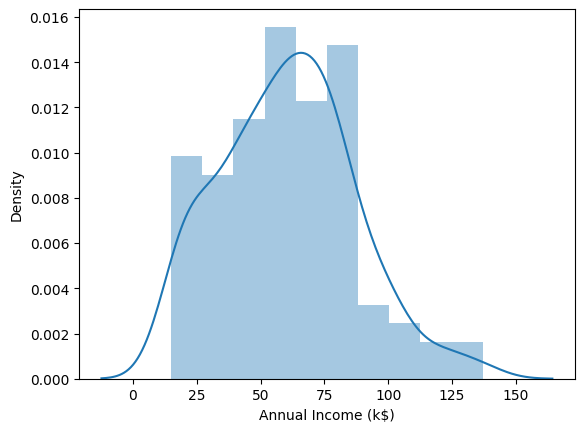

In [105]:
sns.distplot(df['Annual Income (k$)']);

In [106]:
# Call the columns
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

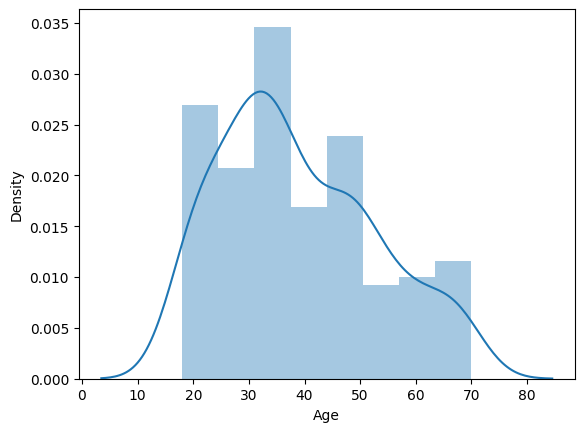

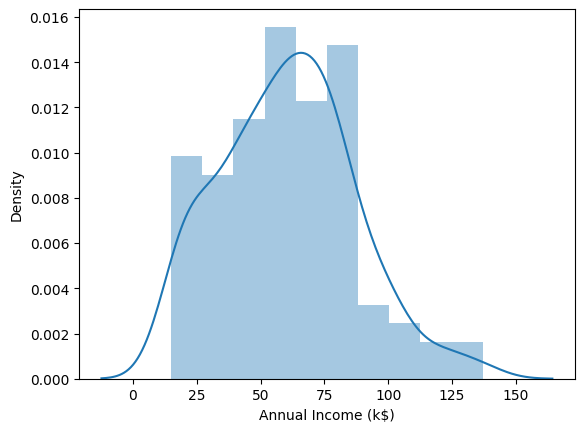

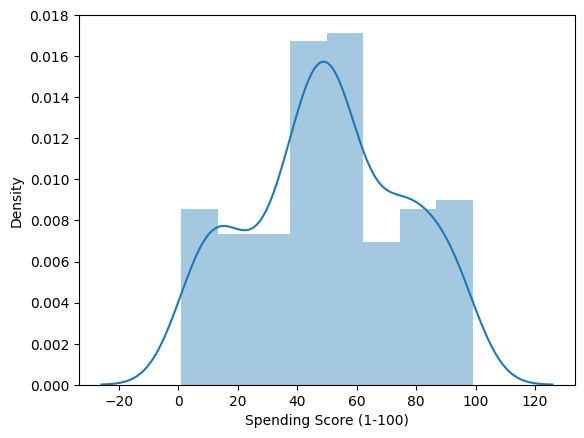

In [107]:
# i represents all variables in the list called columns.
# Also note that i is already string varibles in columns so it cannot be a string in sns.distplot.
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

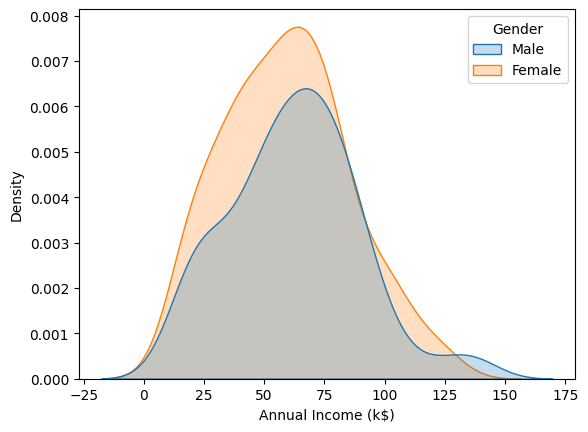

In [108]:
sns.kdeplot(data = df, x = 'Annual Income (k$)', shade = True, hue ='Gender');

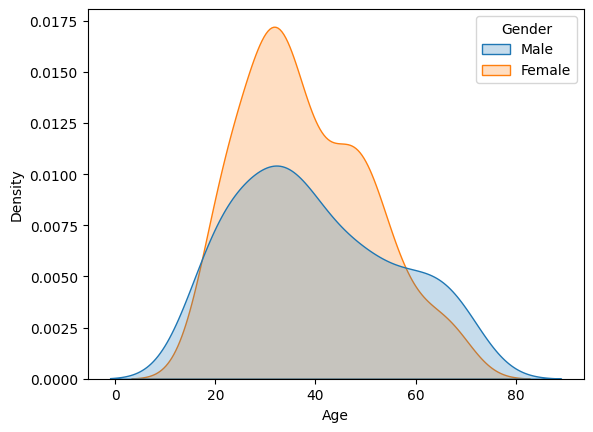

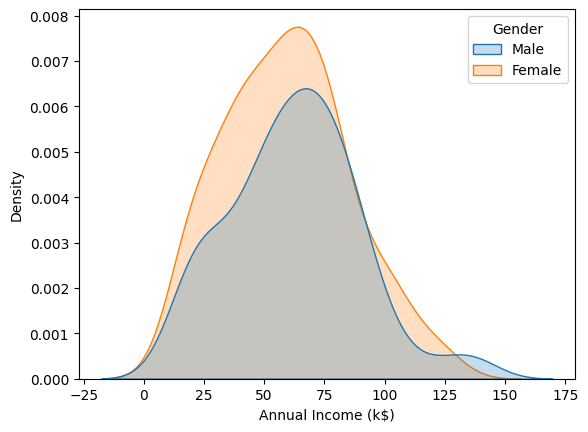

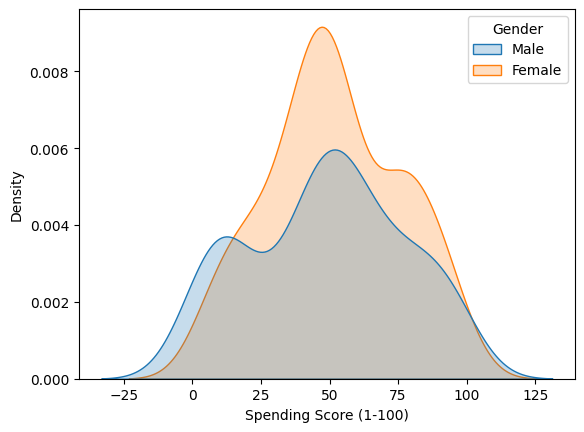

In [109]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data = df, x = i, shade = True, hue ='Gender');

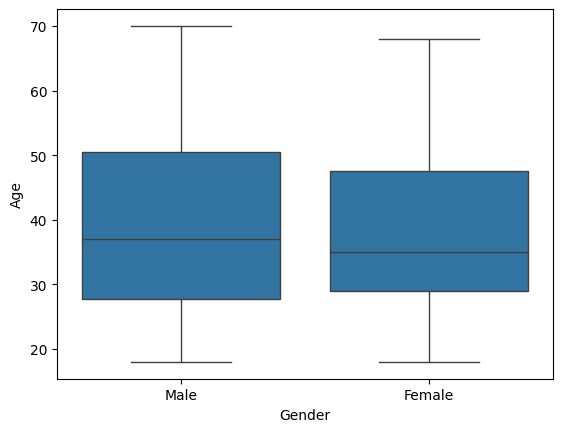

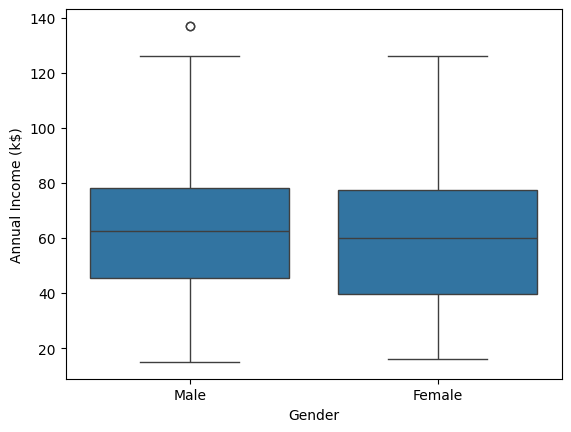

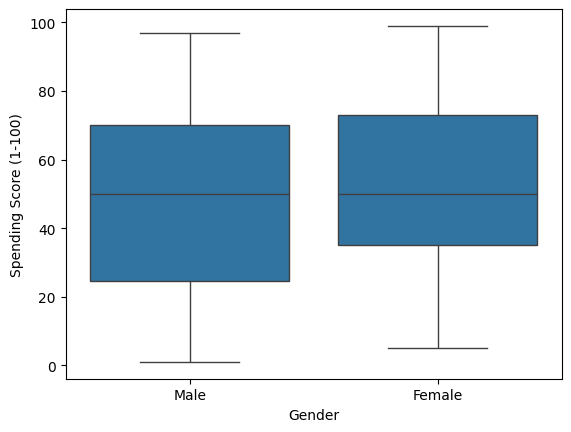

In [110]:
## Now let's do something with .boxplot() instead of .distplot()
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data = df, x = 'Gender', y = df[i])

In [111]:
df['Gender'].value_counts(normalize = True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

## Bivariate Analyses

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

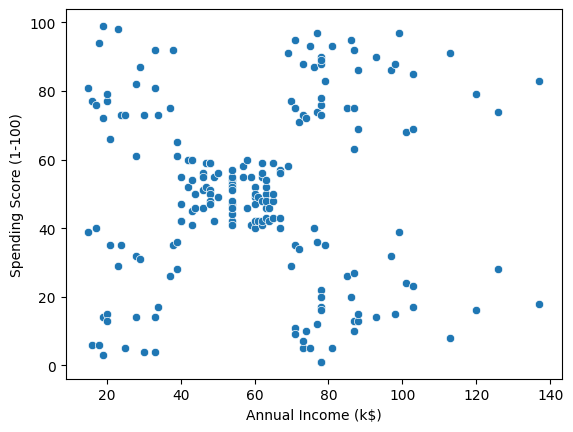

In [112]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

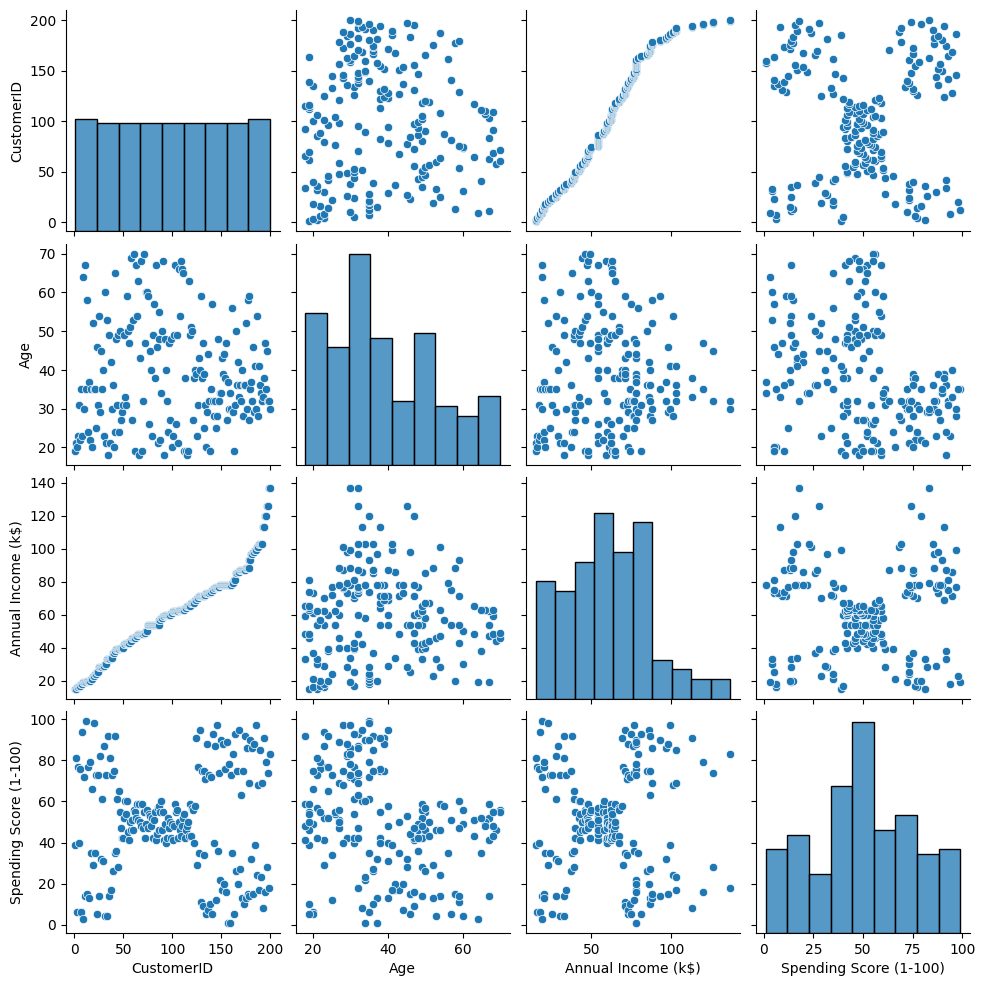

In [113]:
sns.pairplot(df)

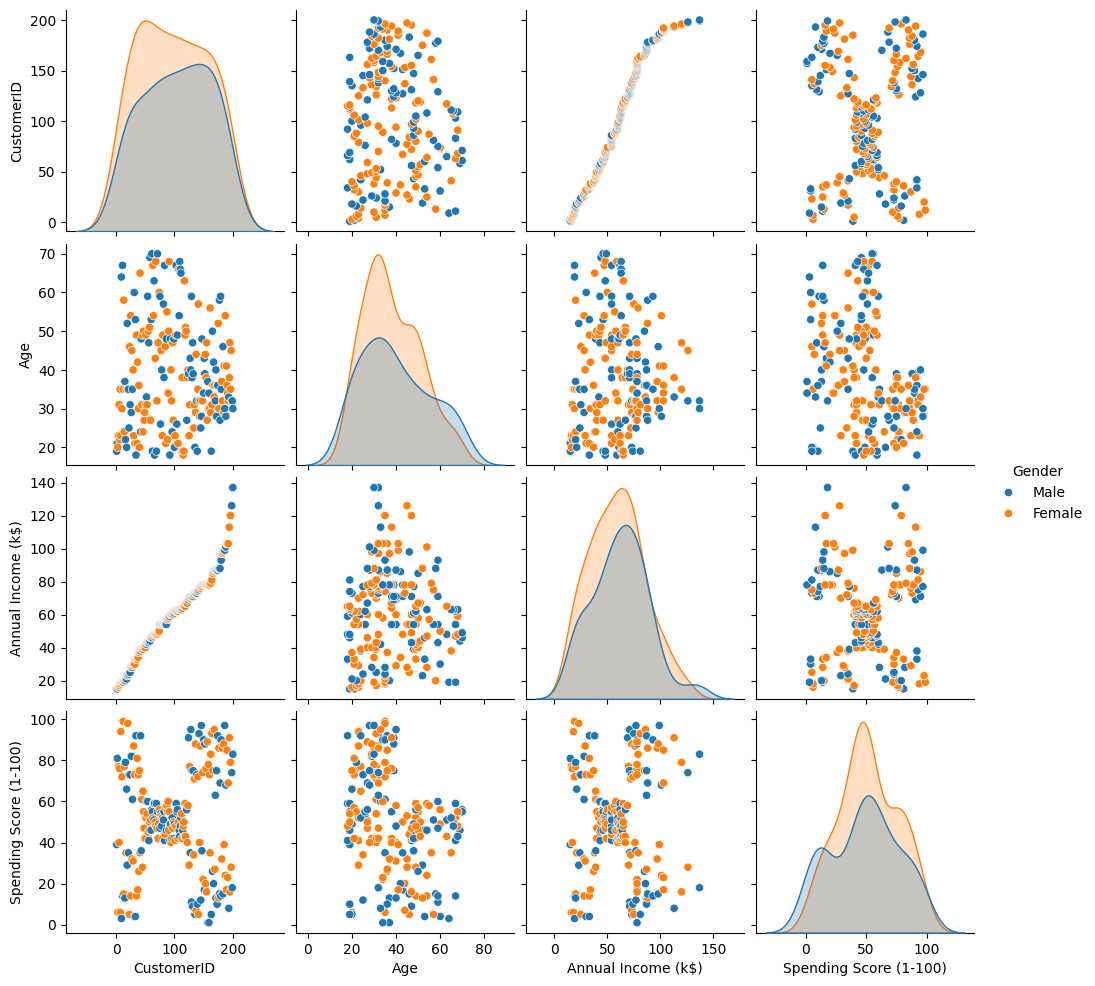

In [115]:
sns.pairplot(df, hue = 'Gender')

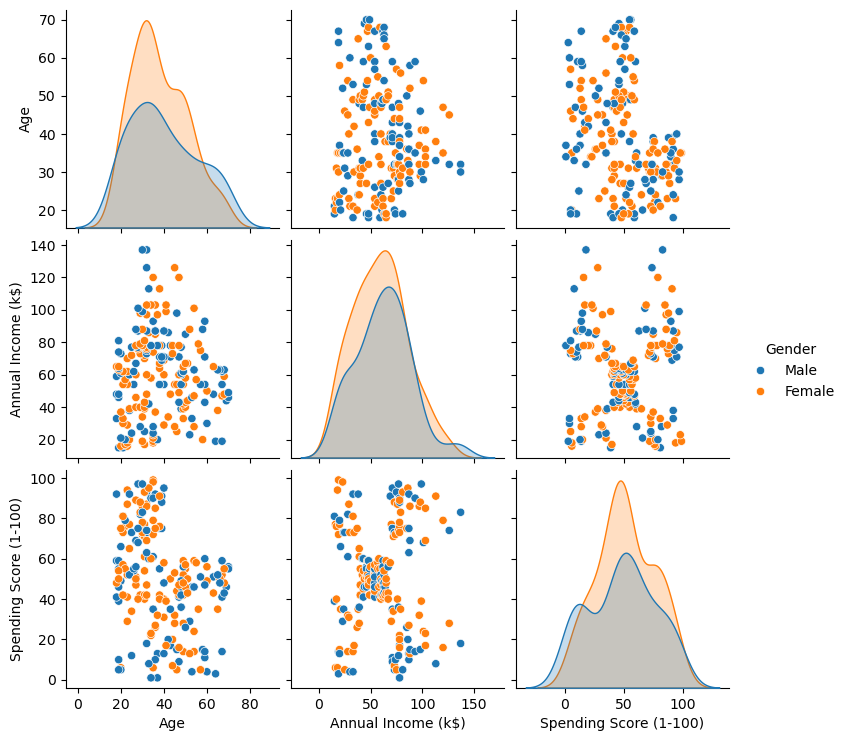

In [15]:
df = df.drop('CustomerID', axis = 1)
sns.pairplot(df, hue = 'Gender')

In [116]:
df.groupby(['Gender'])[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [118]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Gender'] = df['Gender'].astype(float)

In [119]:
correlation_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']].corr(method='pearson')
correlation_selected_columns = correlation_matrix[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

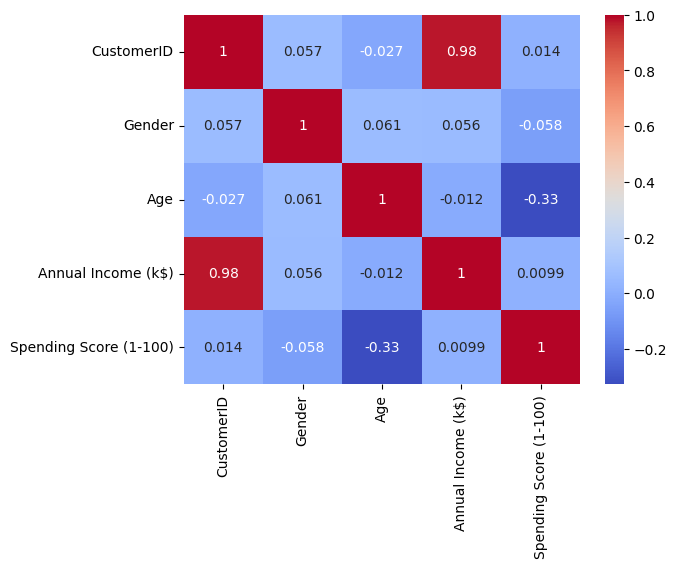

In [120]:
correlation_matrix = df.corr(method='pearson')

# Plotting the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Clustering - Univariate, Bivariate and Multivariate

In [ ]:
##Univariate clustering
##Let's define the algorithim KMeans

In [121]:
clustering1 = KMeans(n_clusters = 3)

In [122]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [123]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [124]:
##Income cluster column should be equal to clustering1.labels_
df['Income cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster
0,1,1.0,19,15,39,2
1,2,1.0,21,15,81,2
2,3,0.0,20,16,6,2
3,4,0.0,23,16,77,2
4,5,0.0,31,17,40,2


In [125]:
df['Income cluster'].value_counts()

Income cluster
0    86
2    58
1    56
Name: count, dtype: int64

In [126]:
clustering1.inertia_

25640.457784396833

In [127]:
## Train the KMeans algorithim
inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [128]:
print(inertia_scores)

[137277.28000000003, 49761.73701298701, 23528.152173913055, 13278.112713472487, 8667.679614837509, 5103.823725981623, 3949.2756132756135, 3115.5079365079373, 2682.565307241778, 1933.275432900433]


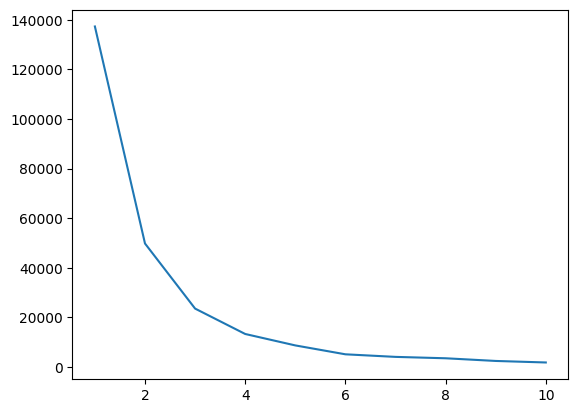

In [47]:
plt.plot(range(1,11),inertia_scores)

In [129]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income cluster'],
      dtype='object')

In [130]:
df.groupby('Income cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income cluster,,,
0,41.279070,60.906977,50.337209
1,36.910714,92.142857,50.517857
2,37.120690,29.551724,49.689655


## Bivariate Clustering

In [131]:
clustering2 = KMeans(n_clusters = 5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income Cluster
0,1,1.0,19,15,39,2,3
1,2,1.0,21,15,81,2,1
2,3,0.0,20,16,6,2,3
3,4,0.0,23,16,77,2,1
4,5,0.0,31,17,40,2,3


In [132]:
df['Spending and Income Cluster'].value_counts()

Spending and Income Cluster
4    80
0    39
2    36
3    23
1    22
Name: count, dtype: int64

In [133]:
clustering2.inertia_

44454.47647967974

In [134]:
inertia_scores2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters = i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

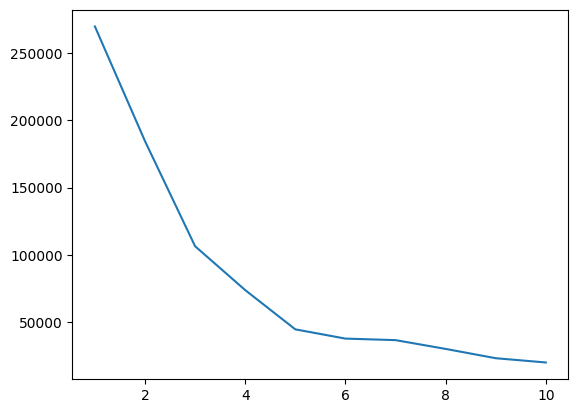

In [41]:
plt.plot(range(1,11),inertia_scores2)

In [135]:
## Retrieve a cluster center from clustering2 using pd by converting to a data frame using pd.DataFrame.
##Note whatever is in the argumenet is what is being converted to a dataframe.
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

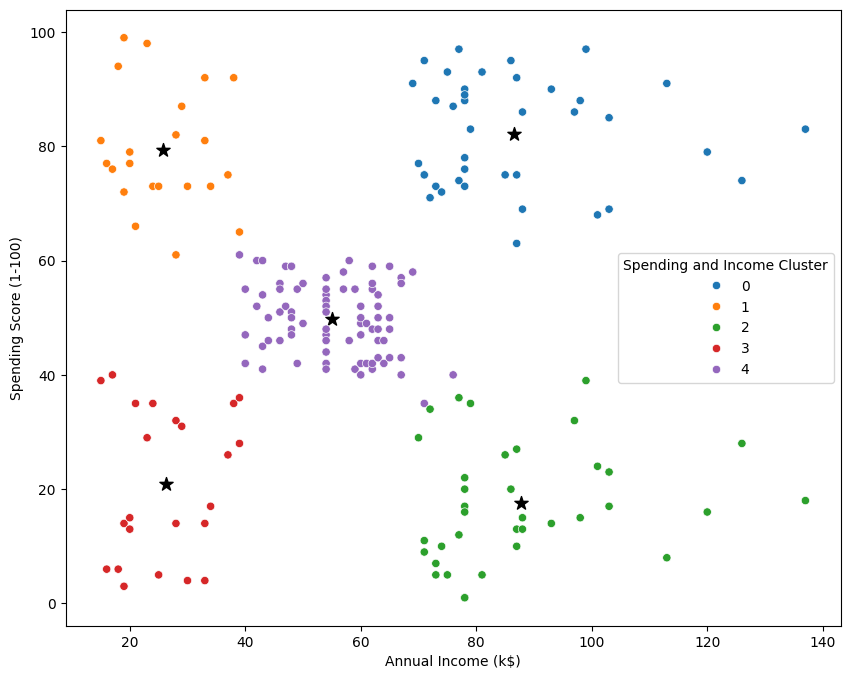

In [136]:
plt.figure(figsize = (10,8))
plt.scatter(x = centers['x'], y = centers['y'], s = 100, c = 'black', marker = '*')
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Spending and Income Cluster', palette = 'tab10')
plt.savefig('clustering_bivariate.png')

In [137]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,0.0,1.0
Spending and Income Cluster,,
0,0.538462,0.461538
1,0.590909,0.409091
2,0.472222,0.527778
3,0.608696,0.391304
4,0.587500,0.412500


In [138]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,32.692308,86.538462,82.128205
1,25.272727,25.727273,79.363636
2,40.666667,87.750000,17.583333
3,45.217391,26.304348,20.913043
4,42.937500,55.087500,49.712500


## Multivariate Clustering

In [139]:
from sklearn.preprocessing import StandardScaler

In [140]:
##Initialize StandardScaler
scale = StandardScaler()

In [141]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income Cluster
0,1,1.0,19,15,39,2,3
1,2,1.0,21,15,81,2,1
2,3,0.0,20,16,6,2,3
3,4,0.0,23,16,77,2,1
4,5,0.0,31,17,40,2,3


In [142]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income Cluster
0,1,1.0,19,15,39,2,3
1,2,1.0,21,15,81,2,1
2,3,0.0,20,16,6,2,3
3,4,0.0,23,16,77,2,1
4,5,0.0,31,17,40,2,3


In [143]:
dff.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income cluster',
       'Spending and Income Cluster'],
      dtype='object')

In [145]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,19,15,39,1.0
1,21,15,81,1.0
2,20,16,6,0.0
3,23,16,77,0.0
4,31,17,40,0.0


In [147]:
##Now to apply StandardScaler to the features that matter
dff = scale.fit_transform(dff)

In [146]:
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,19,15,39,1.0
1,21,15,81,1.0
2,20,16,6,0.0
3,23,16,77,0.0
4,31,17,40,0.0


In [148]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


In [91]:
##Since we need all the columns in the data frame above we do not have to call them in Kmeans3.fit(dff[[....) below.
inertia_scores3 = []
for i in range(1,11):
    kmeans3 = KMeans(n_clusters = i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)

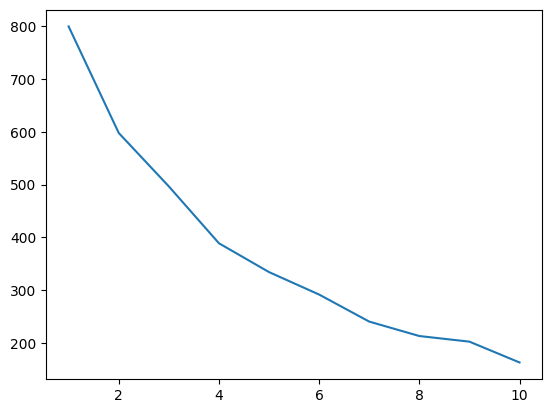

In [92]:
plt.plot(range(1,11),inertia_scores3);

In [149]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income Cluster
0,1,1.0,19,15,39,2,3
1,2,1.0,21,15,81,2,1
2,3,0.0,20,16,6,2,3
3,4,0.0,23,16,77,2,1
4,5,0.0,31,17,40,2,3
...,...,...,...,...,...,...,...
195,196,0.0,35,120,79,1,0
196,197,0.0,45,126,28,1,2
197,198,1.0,32,126,74,1,0
198,199,1.0,32,137,18,1,2


In [150]:
##We are going to save this data frame as a csv file. 1st we have to convert to a csv file and rename it.
df.to_csv('Clustering.csv')

In [151]:
import sys
print(sys.version)

3.9.18 (main, Sep 11 2023, 14:09:26) [MSC v.1916 64 bit (AMD64)]
